In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer

In [23]:
data = pd.read_csv("/home/mike/Downloads/data/archive(4)/bank.csv")

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [27]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [29]:
data.index

RangeIndex(start=0, stop=4521, step=1)

In [30]:
categorigal = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
numerical = ['age', 'balance', 'duration', 'campaign', 'pdays',
       'previous']

In [31]:
data[categorigal] = data[categorigal].astype('category')
data[numerical] = data[numerical].astype('float')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   float64 
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   float64 
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   object  
 11  duration   4521 non-null   float64 
 12  campaign   4521 non-null   float64 
 13  pdays      4521 non-null   float64 
 14  previous   4521 non-null   float64 
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(9), float64(6), int64(1), object(1)
memory usage: 324.0+ KB


In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no


In [34]:
data.drop(['day','month'], inplace=True, axis=1)

In [35]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,226.0,1.0,-1.0,0.0,unknown,no


In [36]:
data = pd.get_dummies(data, drop_first=True)

In [37]:
data.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30.0,1787.0,79.0,1.0,-1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33.0,4789.0,220.0,1.0,339.0,4.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,35.0,1350.0,185.0,1.0,330.0,1.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,30.0,1476.0,199.0,4.0,-1.0,0.0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
4,59.0,0.0,226.0,1.0,-1.0,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [38]:
data.y_yes.value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

In [43]:
data.rename(columns={'y_yes':'y'}, inplace=True)

In [44]:
data.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,30.0,1787.0,79.0,1.0,-1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33.0,4789.0,220.0,1.0,339.0,4.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,35.0,1350.0,185.0,1.0,330.0,1.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,30.0,1476.0,199.0,4.0,-1.0,0.0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
4,59.0,0.0,226.0,1.0,-1.0,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [45]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520],
           dtype='int64', length=4521)

In [46]:
y = data.pop('y')
X = data

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### decision tree classifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2_000, shuffle=False
)

In [49]:
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

### Adaboost with discrete SAMME and real SAMME.R

In [51]:
n_estimators = 400
learning_rate = 1.0

In [54]:
from sklearn.ensemble import AdaBoostClassifier

ada_discrete = AdaBoostClassifier(
#     estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
#     algorithm="SAMME",
)
ada_discrete.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=400, random_state=None)

In [55]:
ada_real = AdaBoostClassifier(
#     estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
#     algorithm="SAMME.R",
)
ada_real.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=400, random_state=None)

In [56]:
import numpy as np
from sklearn.metrics import zero_one_loss

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

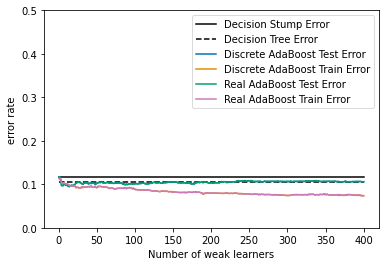

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, "k-", label="Decision Stump Error")
ax.plot([1, n_estimators], [dt_err] * 2, "k--", label="Decision Tree Error")

colors = sns.color_palette("colorblind")

ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err,
    label="Discrete AdaBoost Test Error",
    color=colors[0],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err_train,
    label="Discrete AdaBoost Train Error",
    color=colors[1],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[2],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err_train,
    label="Real AdaBoost Train Error",
    color=colors[4],
)

ax.set_ylim((0.0, 0.5))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("error rate")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()